# Skin Disease Detection  - DermNet - Exploratory Data Analysis

In [ ]:
!pip install opencv-python


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.8 MB/s eta 0:00:00


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import random
import pandas as pd
from collections import Counter
from PIL import Image
import PIL
from datasets import load_dataset
from collections import Counter
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
ds = load_dataset("Muzmmillcoste/dermnet")

# Assuming the dataset has a 'label' column
if "train" in ds:
    dataset_split = ds["train"]  # Modify if another split is needed
else:
    dataset_split = ds[next(iter(ds.keys()))]  # Use any available split

# Retrieve class names from metadata
label_names = ds["train"].features["label"].names

# Count the number of images per class
label_counts = Counter(dataset_split["label"])

# Convert to DataFrame for visualization
df_train_counts = pd.DataFrame([(label_names[label], count) for label, count in label_counts.items()], columns=["Category", "Train Image Count"])

# Sorting the dataset by image count for better visualization
df_train_counts_sorted = df_train_counts.sort_values(by="Train Image Count", ascending=False)

# Print class-wise counts
for label, count in label_counts.items():
    print(f"{label_names[label]}: {count}")

print("\nNumber of classes:", len(label_counts))


Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 962
Eczema Photos: 1060
Nail Fungus and other Nail Disease: 881
Tinea Ringworm Candidiasis and other Fungal Infections: 1105
Seborrheic Keratoses and other Benign Tumors: 1155
Systemic Disease: 506
Herpes HPV and other STDs Photos: 345
Vascular Tumors: 403
Bullous Disease Photos: 377
Psoriasis pictures Lichen Planus and related diseases: 1222
Acne and Rosacea Photos: 693
Warts Molluscum and other Viral Infections: 942
Scabies Lyme Disease and other Infestations and Bites: 370
Exanthems and Drug Eruptions: 345
Atopic Dermatitis Photos: 431
Melanoma Skin Cancer Nevi and Moles: 392
Vasculitis Photos: 361
Lupus and other Connective Tissue diseases: 371
Urticaria Hives: 172
Light Diseases and Disorders of Pigmentation: 476
Hair Loss Photos Alopecia and other Hair Diseases: 194
Cellulitis Impetigo and other Bacterial Infections: 238
Poison Ivy Photos and other Contact Dermatitis: 222

Number of classes: 23


#### Visualize the Class Distribution

<ipython-input-10-4e18081dc897>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train_counts_sorted, x="Category", y="Train Image Count", palette="viridis")


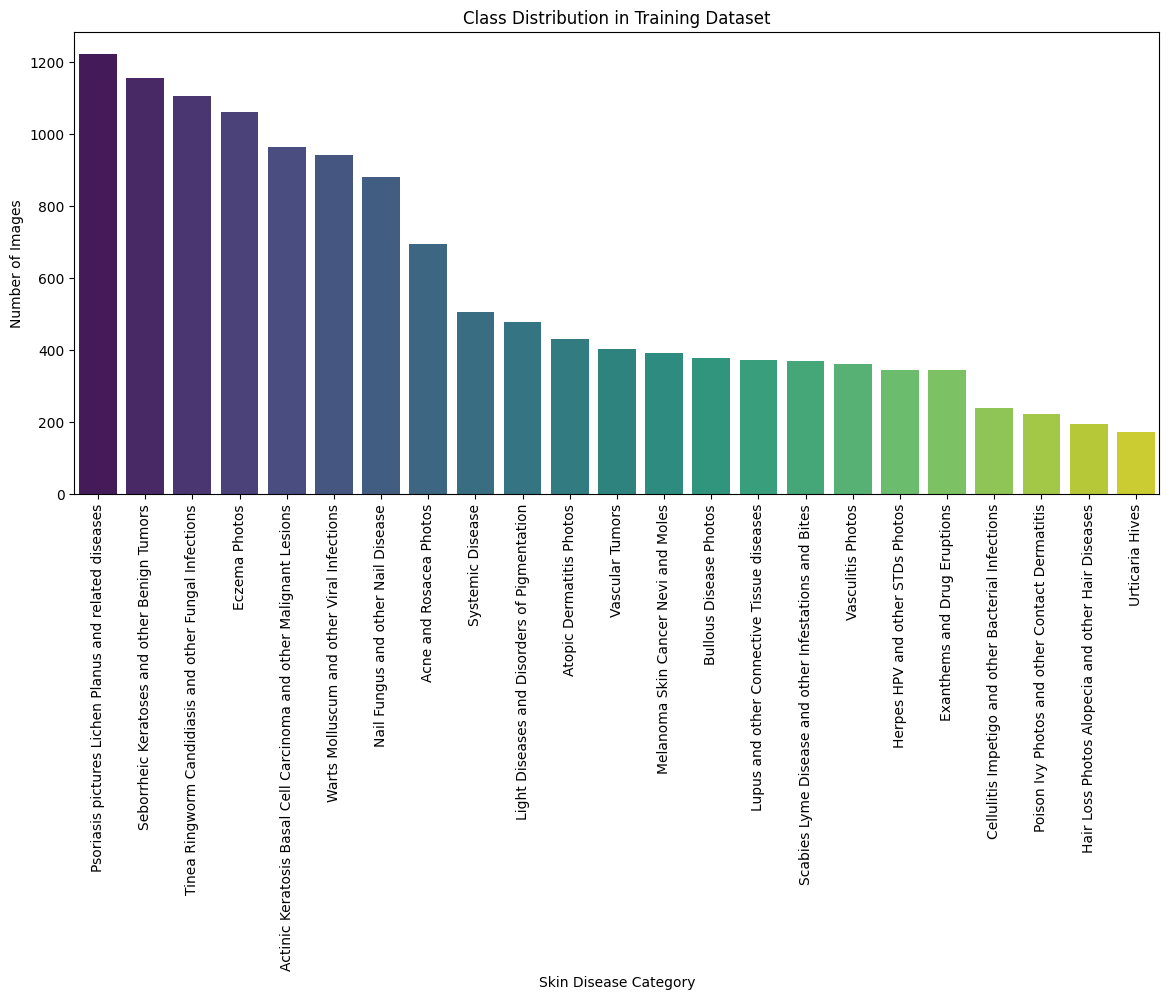

In [ ]:
# Plot class balance
plt.figure(figsize=(14, 6))
sns.barplot(data=df_train_counts_sorted, x="Category", y="Train Image Count", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Skin Disease Category")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Dataset")
plt.show()

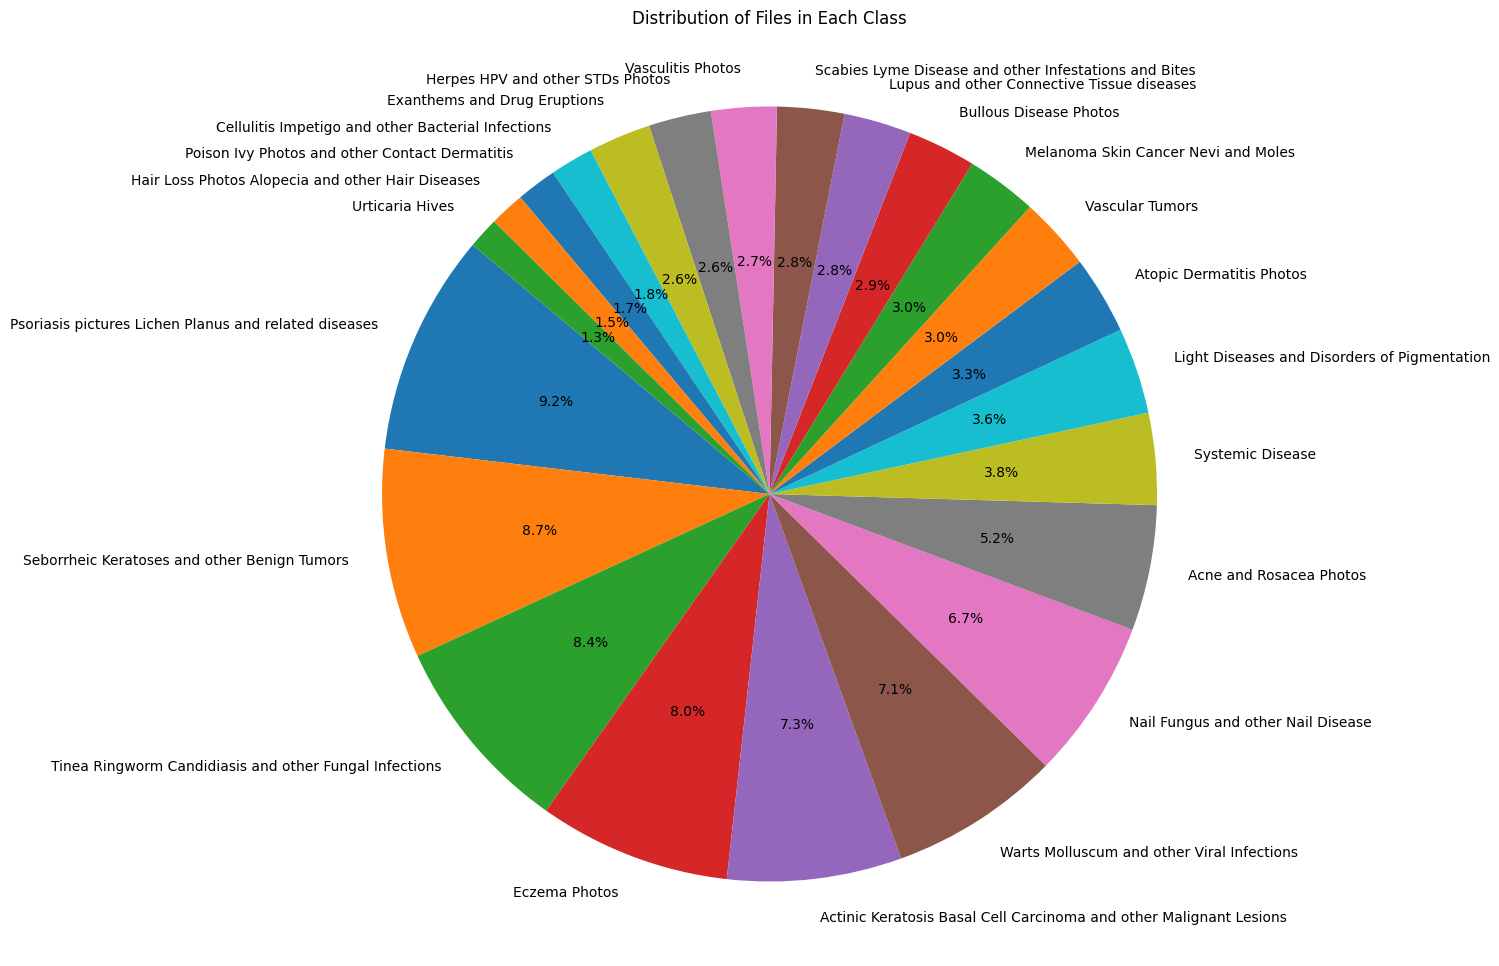

In [ ]:
# Plot pie chart for class distribution
plt.figure(figsize=(11, 12))
plt.pie(df_train_counts_sorted["Train Image Count"],
        labels=df_train_counts_sorted["Category"],
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 10})

plt.axis('equal')
plt.title('Distribution of Files in Each Class')
plt.show()

There is a slight imbalance in our dataset. Eczema and psorasis seems to be common skin problems and contributes to 8% and 9% of the training images respectively.

### Training and Test set Distribution

In [ ]:
# Check if dataset has train and test splits
if "train" in ds and "test" in ds:
    train_split = ds["train"]
    test_split = ds["test"]
else:
    raise ValueError("Dataset does not contain 'train' and 'test' splits.")

# Retrieve class names from metadata
label_names = ds["train"].features["label"].names

In [ ]:
# Count the number of images per class in train and test
train_counts = Counter(train_split["label"])
test_counts = Counter(test_split["label"])

# Calculate total counts
total_train = sum(train_counts.values())
total_test = sum(test_counts.values())

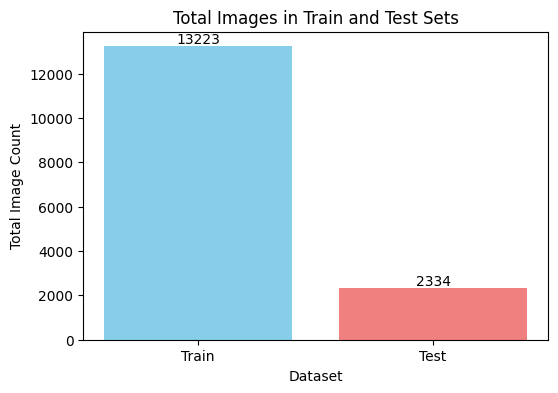

In [ ]:
# Create the bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(['Train', 'Test'], [total_train, total_test], color=['skyblue', 'lightcoral'])
plt.xlabel("Dataset")
plt.ylabel("Total Image Count")
plt.title("Total Images in Train and Test Sets")

# Add text annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

### Top 5 Skin conditions in our dataset

In [ ]:
# Sorting the dataset by image count for better visualization
df_train_counts_sorted = df_train_counts.sort_values(by="Train Image Count", ascending=False)

# Display top 5 skin conditions in dataset
top_5_conditions = df_train_counts_sorted.head(5)
print("\nTop 5 Skin Conditions:")
top_5_conditions


Top 5 Skin Conditions:


,Category,Train Image Count
9,Psoriasis pictures Lichen Planus and related d...,1222
4,Seborrheic Keratoses and other Benign Tumors,1155
3,Tinea Ringworm Candidiasis and other Fungal In...,1105
1,Eczema Photos,1060
0,Actinic Keratosis Basal Cell Carcinoma and oth...,962


<ipython-input-20-2f377386f359>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_conditions, x="Category", y="Train Image Count", palette="coolwarm")


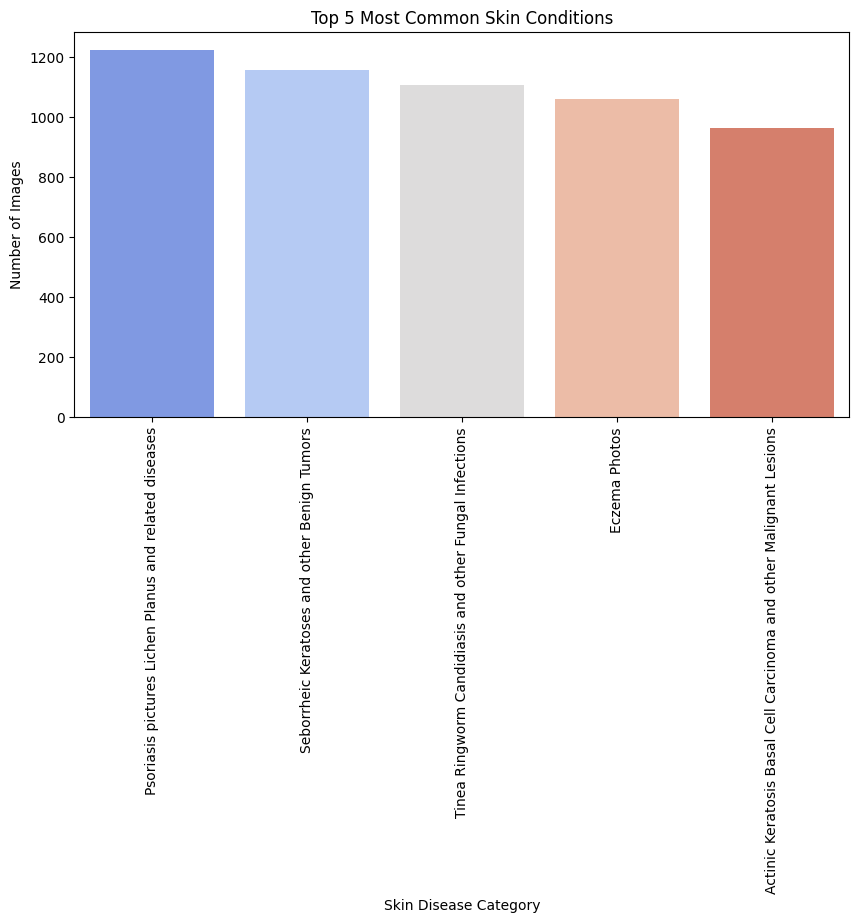

In [ ]:
# Plot bar chart for top 5 conditions
plt.figure(figsize=(10, 5))
sns.barplot(data=top_5_conditions, x="Category", y="Train Image Count", palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Skin Disease Category")
plt.ylabel("Number of Images")
plt.title("Top 5 Most Common Skin Conditions")
plt.show()


### Image Resolution Analysis in training images

In [ ]:
# Analyzing image dimensions
image_dimensions = []
for img_data in train_split:
    try:
        img = img_data["image"]  # Directly use the PIL Image object
        image_dimensions.append(img.size)
    except Exception as e:
        print(f"Warning: Skipping image due to error: {e}")


In [ ]:
# Convert to DataFrame
df_image_dims = pd.DataFrame(image_dimensions, columns=["Width", "Height"])

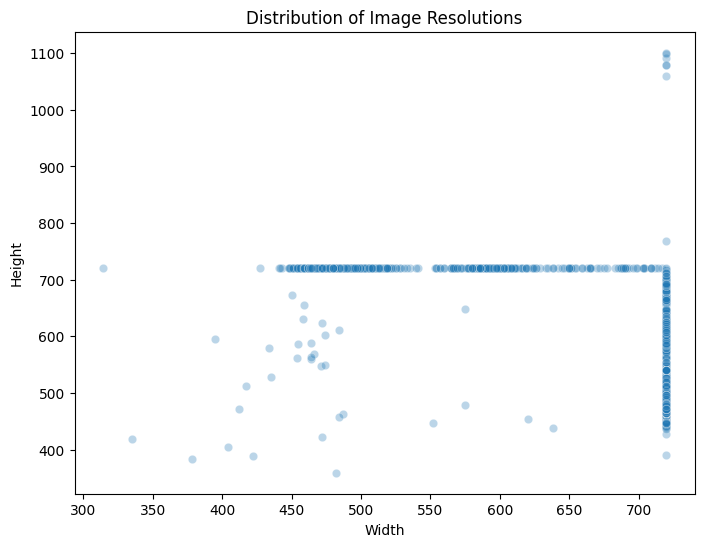

In [ ]:
# Plotting image size distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_image_dims, x="Width", y="Height", alpha=0.3)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Distribution of Image Resolutions")
plt.show()


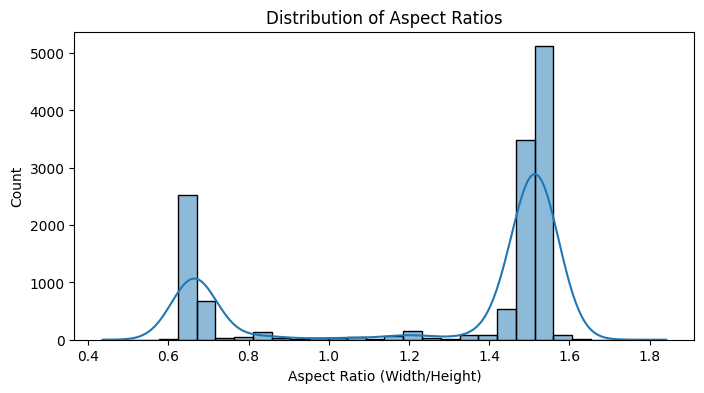


Basic Image Dimension Statistics:
              Width        Height  Aspect Ratio
count  13223.000000  13223.000000  13223.000000
mean     658.783332    544.261287      1.282610
std      104.186914    108.020825      0.367146
min      314.000000    359.000000      0.436111
25%      589.000000    472.000000      0.820833
50%      720.000000    480.000000      1.500000
75%      720.000000    720.000000      1.525424
max      720.000000   1101.000000      1.841432


In [ ]:
# Checking aspect ratios
df_image_dims["Aspect Ratio"] = df_image_dims["Width"] / df_image_dims["Height"]
plt.figure(figsize=(8, 4))
sns.histplot(df_image_dims["Aspect Ratio"], bins=30, kde=True)
plt.xlabel("Aspect Ratio (Width/Height)")
plt.title("Distribution of Aspect Ratios")
plt.show()

# Print basic statistics
print("\nBasic Image Dimension Statistics:")
print(df_image_dims.describe())

In [ ]:
# Counting unique image sizes
image_size_counts = df_image_dims.groupby(["Width", "Height"]).size().reset_index(name="Count")

# Display the top 10 most common image sizes
print(image_size_counts.sort_values(by="Count", ascending=False).head(10))

# Plotting the most common image sizes



     Width  Height  Count
248    720     472   3376
256    720     480   1495
59     480     720    743
250    720     474    415
253    720     477    374
240    720     464    364
56     477     720    302
255    720     479    291
49     472     720    259
58     479     720    171


### Image Colour Analysis

In [ ]:
# Analyzing image dimensions and computing mean/std
image_dimensions = []
categories = []
mean_values = []
std_values = []

for img_data in train_split:
    try:
        img = img_data["image"]  # Directly use PIL Image from dataset
        image_dimensions.append(img.size)
        categories.append(label_names[img_data["label"]])

        img_array = np.array(img).astype(np.float32) / 255.0  # Normalize
        mean_values.append(np.mean(img_array, axis=(0, 1)))
        std_values.append(np.std(img_array, axis=(0, 1)))
    except Exception as e:
        print(f"Warning: Skipping image due to error: {e}")

# Convert to DataFrame
df_image_dims = pd.DataFrame(image_dimensions, columns=["Width", "Height"])
df_image_dims['Category'] = categories

# Compute mean and standard deviation
if mean_values:
    mean_rgb = np.mean(mean_values, axis=0)
    std_rgb = np.mean(std_values, axis=0)
    print(f"✅ Mean RGB Values: {mean_rgb}")
    print(f"✅ Standard Deviation RGB Values: {std_rgb}")
else:
    print("🚨 Could not compute statistics due to missing/invalid images.")

✅ Mean RGB Values: [0.54151905 0.4143129  0.38259336]
✅ Standard Deviation RGB Values: [0.1931299  0.16628343 0.16067074]


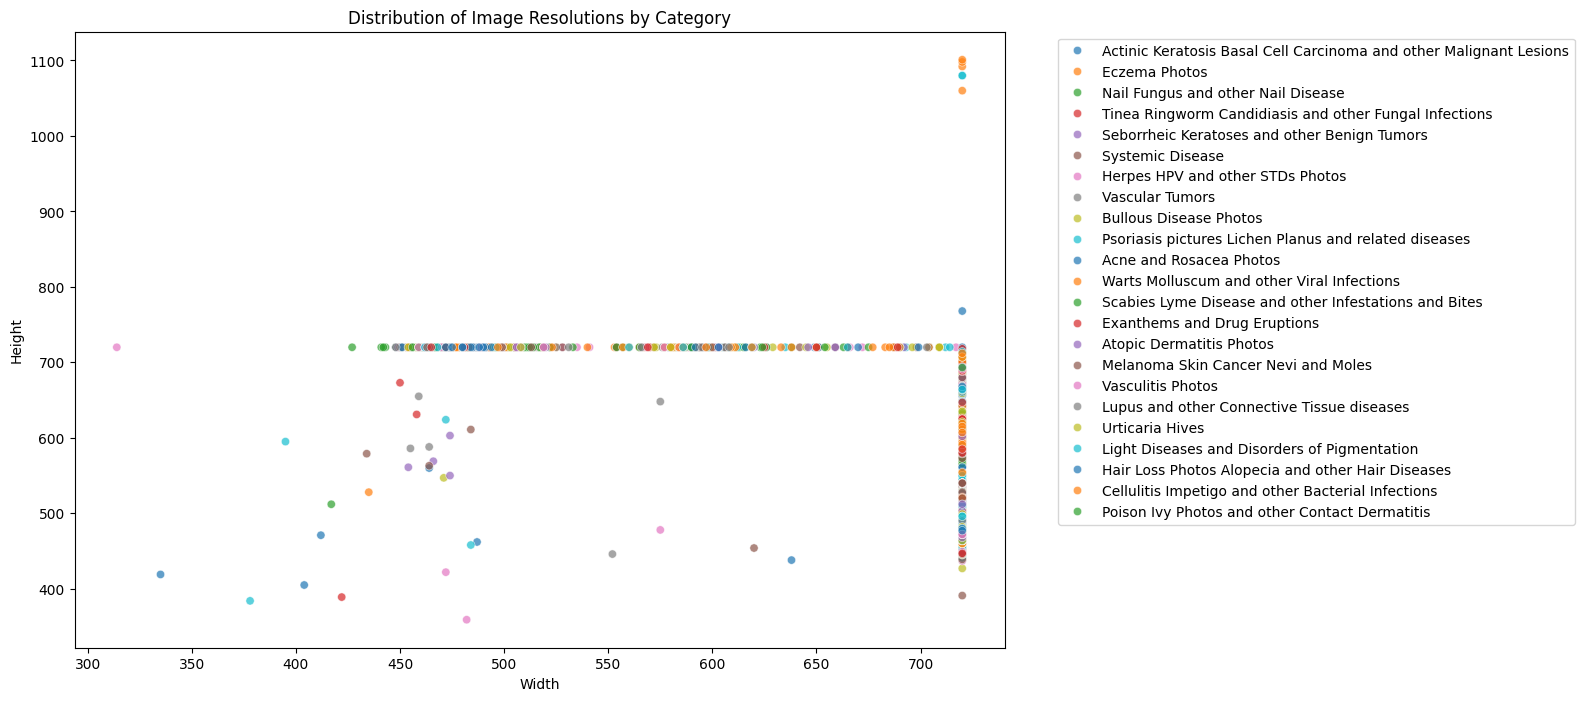

In [ ]:
# Plotting image size distribution by category
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_image_dims, x="Width", y="Height", hue="Category", alpha=0.7, palette="tab10")
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Distribution of Image Resolutions by Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The height and width of the images vary. so we need to rescale them to a fixed image size (224 x 224)

### Visualize the training and test images

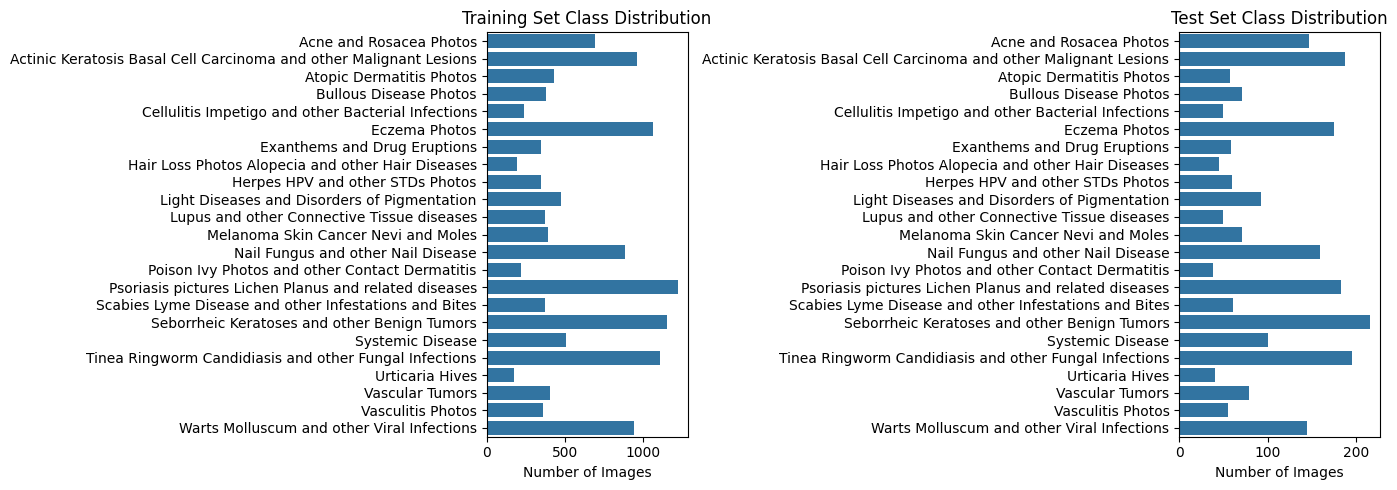

In [ ]:
# Retrieve class names from metadata
class_names = ds["train"].features["label"].names

# Count occurrences of each class
train_counts = Counter(train_split["label"])
test_counts = Counter(test_split["label"])

# Convert to lists for plotting
train_labels, train_values = zip(*sorted(train_counts.items()))
test_labels, test_values = zip(*sorted(test_counts.items()))

# Plot class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=train_values, y=[class_names[i] for i in train_labels], ax=axes[0])
sns.barplot(x=test_values, y=[class_names[i] for i in test_labels], ax=axes[1])

axes[0].set_title("Training Set Class Distribution")
axes[1].set_title("Test Set Class Distribution")
axes[0].set_xlabel("Number of Images")
axes[1].set_xlabel("Number of Images")

plt.tight_layout()
plt.show()




In [ ]:
import textwrap

# Function to visualize images with wrapped labels
def show_images(dataset, title, num_images=12):
    plt.figure(figsize=(20, 12))
    plt.suptitle(title, fontsize=14)

    for i, example in enumerate(dataset.select(range(num_images))):
        ax = plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns

        # Convert to PIL Image if it's not already
        if isinstance(example["image"], Image.Image):
            image = example["image"]
        elif isinstance(example["image"], np.ndarray):  # NumPy array format
            image = Image.fromarray(example["image"])
        elif isinstance(example["image"], torch.Tensor):  # Torch tensor format
            image = Image.fromarray(example["image"].permute(1, 2, 0).numpy())
        else:
            raise TypeError(f"Unsupported image type: {type(example['image'])}")

        plt.imshow(image)
        plt.axis("off")

        # Wrap class names for readability
        wrapped_label = "\n".join(textwrap.wrap(class_names[example["label"]], width=15))
        plt.title(wrapped_label, fontsize=8)

    plt.show()



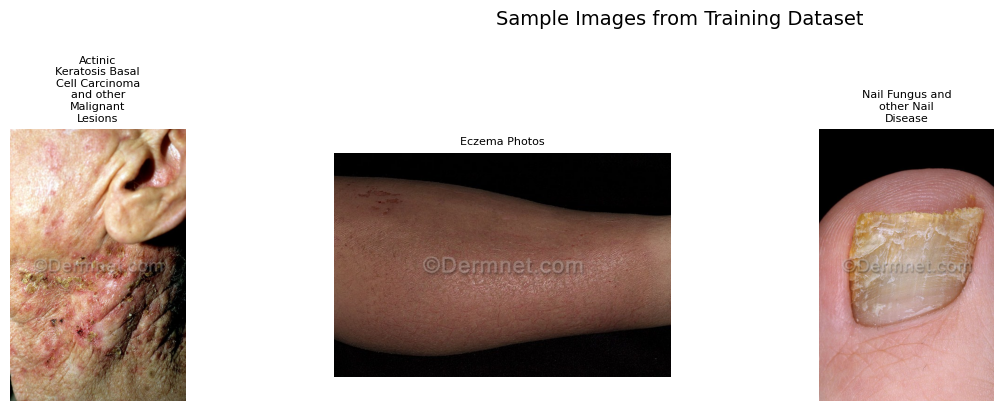

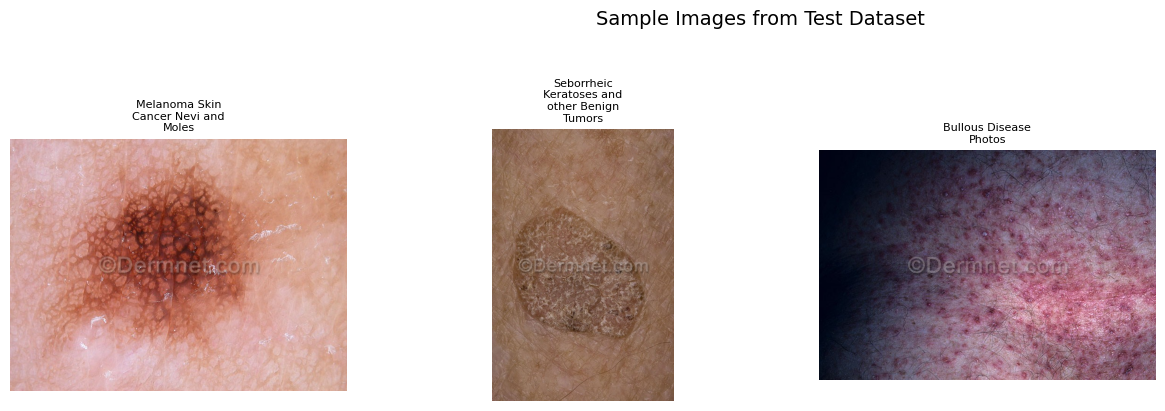

In [ ]:

# Show training images
show_images(train_split, "Sample Images from Training Dataset", 3)

# Show test images
show_images(test_split, "Sample Images from Test Dataset", 3)

### Image Pixels analysis

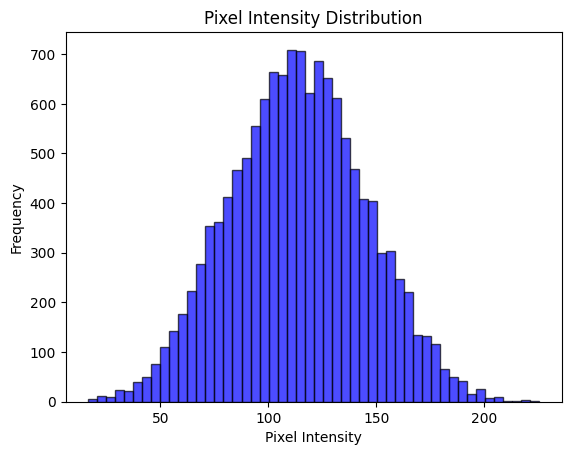

In [ ]:
intensities = []

# Loop through dataset to extract intensity values
for example in train_split:
    image = example["image"]

    # Convert PIL image to NumPy array if needed
    if not isinstance(image, np.ndarray):
        image = np.array(image)

    # Compute mean intensity and append
    intensities.append(image.mean())

# Plot histogram of pixel intensities
plt.hist(intensities, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


### Brightness, sharpness and contrast Distribution

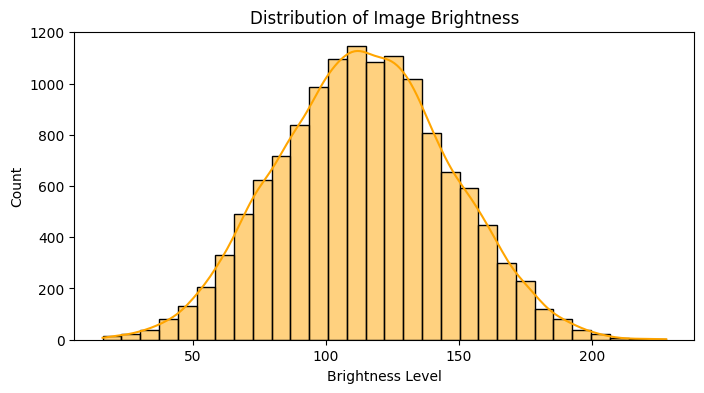

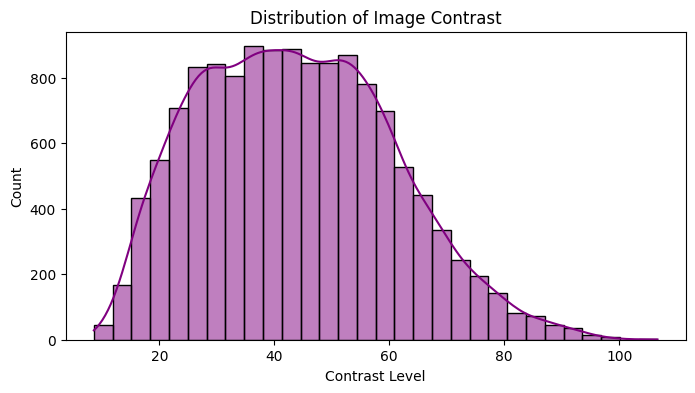

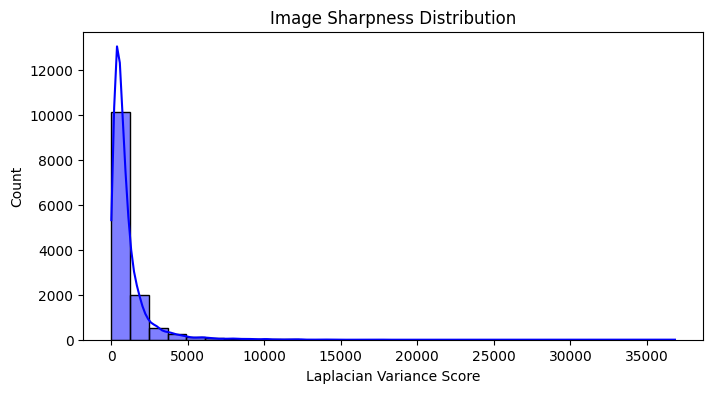

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

# Function to compute brightness, contrast & sharpness (adapted for Hugging Face)
def get_brightness_contrast(image):
    # Convert PIL image to NumPy array
    if not isinstance(image, np.ndarray):
        image = np.array(image)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Compute brightness (mean), contrast (std), and blur (Laplacian variance)
    brightness = np.mean(gray)
    contrast = np.std(gray)
    blur = cv2.Laplacian(gray, cv2.CV_64F).var()

    return brightness, contrast, blur

# Initialize lists
brightness_all = []
contrast_all = []
blur_all = []

# Process images in Hugging Face dataset
for example in train_split:
    image = example["image"]
    b, c, bl = get_brightness_contrast(image)

    brightness_all.append(b)
    contrast_all.append(c)
    blur_all.append(bl)

# Plot brightness distribution
plt.figure(figsize=(8, 4))
sns.histplot(brightness_all, bins=30, kde=True, color='orange')
plt.xlabel("Brightness Level")
plt.title("Distribution of Image Brightness")
plt.show()

# Plot contrast distribution
plt.figure(figsize=(8, 4))
sns.histplot(contrast_all, bins=30, kde=True, color='purple')
plt.xlabel("Contrast Level")
plt.title("Distribution of Image Contrast")
plt.show()

# Plot blur score distribution
plt.figure(figsize=(8, 4))
sns.histplot(blur_all, bins=30, kde=True, color='blue')
plt.xlabel("Laplacian Variance Score")
plt.title("Image Sharpness Distribution")
plt.show()


### Image Size distribution

Map:   0%|          | 0/13223 [00:00<?, ? examples/s]

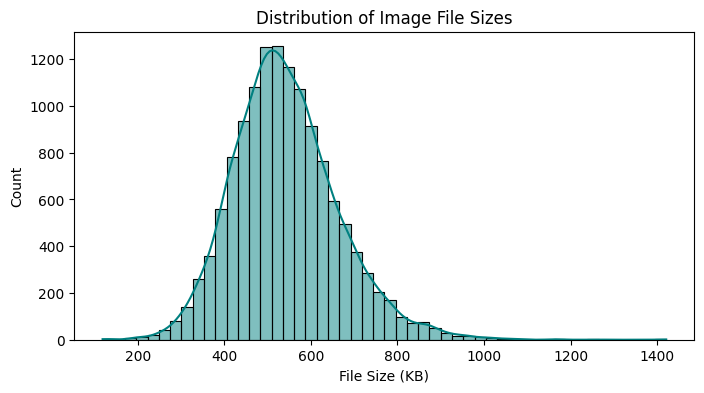

In [ ]:
# Function to compute file size
def compute_file_size(example):
    img_byte_arr = io.BytesIO()
    example["image"].convert("RGB").save(img_byte_arr, format="PNG")
    example["file_size_kb"] = len(img_byte_arr.getvalue()) / 1024  # Convert bytes to KB
    return example

# Apply function using Hugging Face `map()` (Runs Faster)
train_split = train_split.map(compute_file_size)

# Extract file sizes
file_sizes = train_split["file_size_kb"]

# Plot file size distribution
plt.figure(figsize=(8, 4))
sns.histplot(file_sizes, bins=50, kde=True, color="teal")
plt.xlabel("File Size (KB)")
plt.title("Distribution of Image File Sizes")
plt.show()
